C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DB Index: 0.8097517567371049


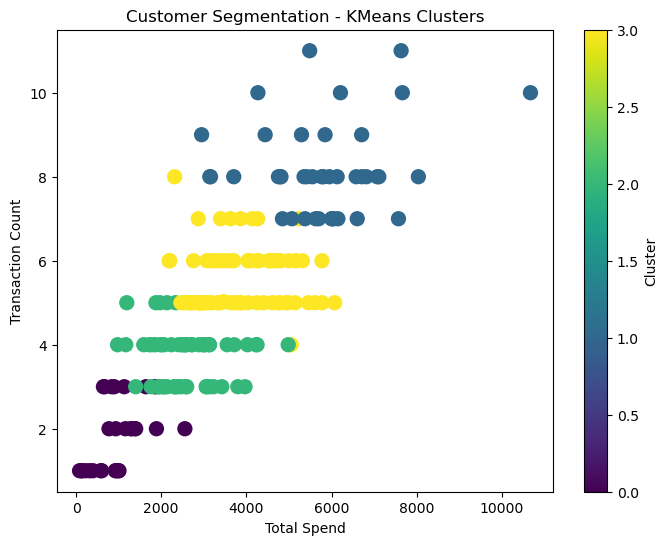

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data
customers_df = pd.read_csv('C:/Users/Eshwar/Downloads/Customers.csv')
transactions_df = pd.read_csv('C:/Users/Eshwar/Downloads/Transactions.csv')

# Step 1: Data Preprocessing
# Aggregate transaction data by CustomerID
transaction_summary = transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Merge customer data with transaction data
customer_data = pd.merge(customers_df, transaction_summary, on='CustomerID', how='left')

# Step 2: Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
customer_data_imputed = customer_data.copy()
customer_data_imputed[['total_spend', 'transaction_count', 'unique_products']] = imputer.fit_transform(customer_data[['total_spend', 'transaction_count', 'unique_products']])

# Step 3: Feature Engineering (Standardizing the data)
features = customer_data_imputed[['total_spend', 'transaction_count', 'unique_products']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Clustering
# Apply KMeans clustering (using 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data_imputed['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Calculate Clustering Metrics
# DB Index Calculation
db_index = davies_bouldin_score(scaled_features, customer_data_imputed['Cluster'])
print(f"DB Index: {db_index}")

# Step 6: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data_imputed['total_spend'], customer_data_imputed['transaction_count'], c=customer_data_imputed['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segmentation - KMeans Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Save the final results
customer_data_imputed.to_csv('customer_segmentation_results.csv', index=False)


In [6]:
print(customers_df.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [8]:
print(transactions_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 2
DB Index: 0.736, Silhouette Score: 0.484, Inertia: 248.390
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 3
DB Index: 0.752, Silhouette Score: 0.435, Inertia: 149.766
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 4
DB Index: 0.810, Silhouette Score: 0.393, Inertia: 116.438
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 5
DB Index: 0.845, Silhouette Score: 0.406, Inertia: 96.770
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 6
DB Index: 0.884, Silhouette Score: 0.390, Inertia: 80.044
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 7
DB Index: 0.838, Silhouette Score: 0.408, Inertia: 65.014
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 8
DB Index: 0.871, Silhouette Score: 0.399, Inertia: 55.593
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 9
DB Index: 0.831, Silhouette Score: 0.401, Inertia: 49.520
--------------------------------------------------


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters: 10
DB Index: 0.791, Silhouette Score: 0.405, Inertia: 44.965
--------------------------------------------------


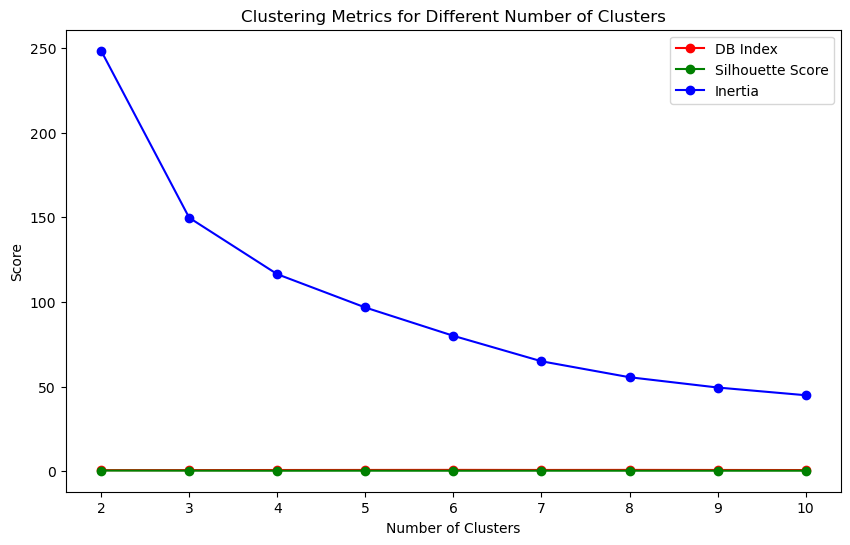

C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


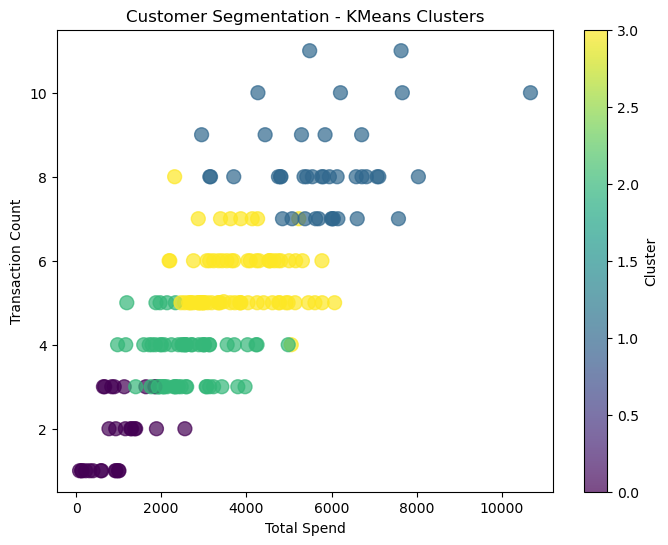

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers_df = pd.read_csv('C:/Users/Eshwar/Downloads/Customers.csv')
transactions_df = pd.read_csv('C:/Users/Eshwar/Downloads/Transactions.csv')

# Step 1: Data Preprocessing
# Aggregate transaction data by CustomerID
transaction_summary = transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Merge customer data with transaction data
customer_data = pd.merge(customers_df, transaction_summary, on='CustomerID', how='left')

# Step 2: Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
customer_data_imputed = customer_data.copy()
customer_data_imputed[['total_spend', 'transaction_count', 'unique_products']] = imputer.fit_transform(customer_data[['total_spend', 'transaction_count', 'unique_products']])

# Step 3: Feature Engineering (Standardizing the data)
features = customer_data_imputed[['total_spend', 'transaction_count', 'unique_products']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply KMeans Clustering with different cluster sizes (2 to 10 clusters)
db_scores = []
silhouette_scores = []
inertia_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_data_imputed['Cluster'] = kmeans.fit_predict(scaled_features)
    
    # Clustering metrics
    db_index = davies_bouldin_score(scaled_features, customer_data_imputed['Cluster'])
    silhouette_avg = silhouette_score(scaled_features, customer_data_imputed['Cluster'])
    inertia = kmeans.inertia_

    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)
    inertia_scores.append(inertia)
    
    print(f"Clusters: {n_clusters}")
    print(f"DB Index: {db_index:.3f}, Silhouette Score: {silhouette_avg:.3f}, Inertia: {inertia:.3f}")
    print("-" * 50)

# Step 5: Visualize the Metrics (DB Index, Silhouette Score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, label='DB Index', marker='o', color='red')
plt.plot(range(2, 11), silhouette_scores, label='Silhouette Score', marker='o', color='green')
plt.plot(range(2, 11), inertia_scores, label='Inertia', marker='o', color='blue')
plt.title('Clustering Metrics for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

# Step 6: Choose the best number of clusters (based on DB Index or silhouette score)
best_n_clusters = 4  # Example: Based on the analysis above
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
customer_data_imputed['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 6))

# Create a scatter plot and color the points according to their cluster
scatter = plt.scatter(customer_data_imputed['total_spend'], 
                      customer_data_imputed['transaction_count'], 
                      c=customer_data_imputed['Cluster'], 
                      cmap='viridis', s=100, alpha=0.7)

# Add title and labels
plt.title(f'Customer Segmentation - KMeans Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')

# Add colorbar based on the clusters
plt.colorbar(scatter, label='Cluster')

# Show the plot
plt.show()
# Step 8: Save the results to a CSV file
customer_data_imputed.to_csv('customer_segmentation_results.csv', index=False)


C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eshwar\a\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


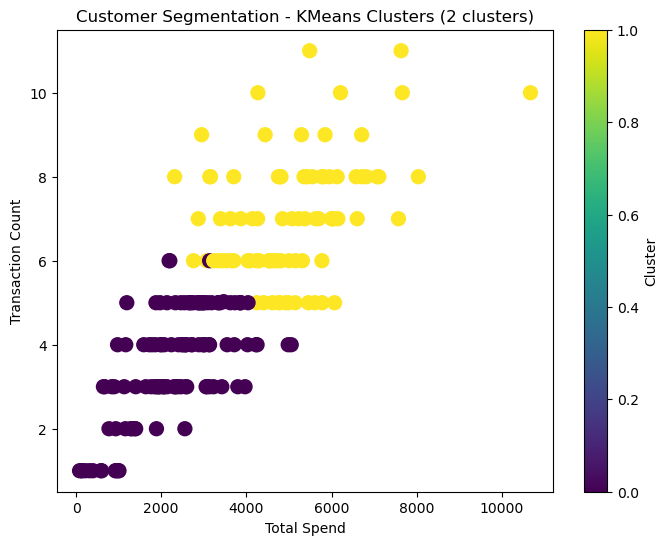

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming customer_data_imputed is already prepared with features and 'Cluster' column
# Use the KMeans clustering algorithm with the optimal number of clusters (2 for now)
optimal_clusters = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data_imputed['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters in a 2D scatter plot (using 'total_spend' and 'transaction_count')
plt.figure(figsize=(8, 6))
scatter = plt.scatter(customer_data_imputed['total_spend'], customer_data_imputed['transaction_count'], 
                      c=customer_data_imputed['Cluster'], cmap='viridis', s=100)

# Add a colorbar to indicate the clusters
plt.colorbar(scatter, label='Cluster')
plt.title(f'Customer Segmentation - KMeans Clusters ({optimal_clusters} clusters)')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')

# Show the plot
plt.show()
